# <a id='toc1_'></a>[Model evaluation](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Model evaluation](#toc1_)    
  - [Regression metrics](#toc1_1_)    
    - [Mean Squared Error](#toc1_1_1_)    
    - [Mean Absolute Error](#toc1_1_2_)    
    - [Mean Absolute Percentage Error (MAPE)](#toc1_1_3_)    
    - [R2 score](#toc1_1_4_)    
  - [Classification metrics](#toc1_2_)    
    - [Accuracy score](#toc1_2_1_)    
    - [Confusion matrix](#toc1_2_2_)    
    - [Precision / Positive Predictive Value](#toc1_2_3_)    
    - [Recall / Sensitivity](#toc1_2_4_)    
    - [F1 score, F-beta score](#toc1_2_5_)    
    - [ROC AUC score](#toc1_2_6_)    
    - [PR AUC score](#toc1_2_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
from sklearn.datasets import  fetch_california_housing, load_breast_cancer
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, average_precision_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

## <a id='toc1_1_'></a>[Regression metrics](#toc0_)

- **RMSE (Mean Squared Error)**: Penalizes large errors, good for when large deviations are particularly bad (e.g., stock price prediction).
- **MAE (Mean Absolute Error)**: More interpretable, but doesn’t penalize large errors as much.
- **MAPE (Mean Absolute Percentage Error)**: Useful when errors should be interpreted relative to the magnitude of predictions.
- **R² Score**: Measures how well the model explains variance in the data.

In [ ]:
california = fetch_california_housing()
print(california["DESCR"])

In [ ]:
df_cali = pd.DataFrame(california["data"], columns = california["feature_names"])
df_cali["median_house_value"] = california["target"]

df_cali.head()

In [22]:
features = df_cali.drop(columns = ["median_house_value","AveOccup", "Population", "AveBedrms"])
target = df_cali["median_house_value"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [24]:
## Training a Model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### <a id='toc1_1_1_'></a>[(Root) Mean Squared Error](#toc0_)

MSE is useful when large errors are particularly undesirable, as it penalizes larger errors more.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

In [ ]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")

### <a id='toc1_1_2_'></a>[Mean Absolute Error](#toc0_)

MAE provides a more interpretable error metric and does not penalize large errors as much as MSE.

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

### <a id='toc1_1_3_'></a>[Mean Absolute Percentage Error (MAPE)](#toc0_)

MAPE is useful when errors need to be evaluated in relative percentage terms.

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.4f}")

### <a id='toc1_1_4_'></a>[R2 score](#toc0_)

R2 indicates how well the model explains variance in the data.

In [ ]:
#Advanteges: General rules are known
#R2 > 0.90 is really good
#If R2 0.99 it's suspicious
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

## <a id='toc1_2_'></a>[Classification metrics](#toc0_)

- **Accuracy**: Good for balanced datasets but misleading for imbalanced ones.
- **Precision**: Focus when false positives are costly (e.g., spam detection).
- **Recall (Sensitivity)**: Important when false negatives are costly (e.g., cancer diagnosis).
- **F1 Score**: Balances precision and recall.
- **F-beta Score**: Balances precision and recall based on a given weight (beta), e.g. precision is 20% important and recall is 80% important.
- **ROC-AUC**: Useful for assessing overall model performance across different thresholds.
- **PR-AUC**: Useful for assessing overall model performance across different thresholds when the data is imbalanced.

In [2]:
cancer = load_breast_cancer()

In [3]:
# Extract dataset into pandas
features = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
labels = pd.Series(cancer['target'], name = 'labels')

In [4]:
# Display features & labels
display(features)
display(labels)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: labels, Length: 569, dtype: int32

In [8]:
labels.value_counts()

labels
1    357
0    212
Name: count, dtype: int64

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=2, test_size=0.2)

In [17]:
## Training a Model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [26]:
classifier.predict_proba(X_test)[:,1] > 0.5

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False, False,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False])

### <a id='toc1_2_1_'></a>[Accuracy score](#toc0_)

Accuracy is useful when the classes are balanced but can be misleading for imbalanced datasets.

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9386


In [21]:
true_positives = ((y_pred == 1) & (y_test == 1)).sum()

print(f"True Positives: {true_positives}")
print(f"Accuracy (positive class): {true_positives/len(y_test)}")

True Positives: 65
Accuracy (positive class): 0.5701754385964912


### <a id='toc1_2_2_'></a>[Confusion matrix](#toc0_)

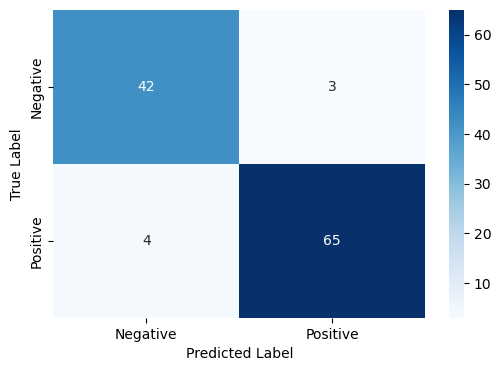

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### <a id='toc1_2_3_'></a>[Precision / Positive Predictive Value](#toc0_)

Precision is important in cases where false positives are costly, such as spam detection.

In [ ]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
#important when false positive is costly like criminal charges

Precision: 0.9559


### <a id='toc1_2_4_'></a>[Recall / Sensitivity](#toc0_)

Recall is critical when false negatives are costly, such as in medical diagnoses.

In [ ]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")
#How many positive I covered 65 out of 69

Recall: 0.9420


### <a id='toc1_2_5_'></a>[F1 score, F-beta score](#toc0_)

F1 Score balances precision and recall, making it useful when both are important.

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
#No good score, will depend of what you want to see, what error is most costly

F1 Score: 0.9489


F-beta score is useful when you need to balance precision and recall but want to weigh one more than the other.

In [25]:
f_beta = fbeta_score(y_test, y_pred, beta=0.6)
print(f"F-beta Score: {f_beta:.4f}")#

F-beta Score: 0.9522


### <a id='toc1_2_6_'></a>[ROC AUC score](#toc0_)

ROC-AUC is useful for assessing overall model performance across different classification thresholds.

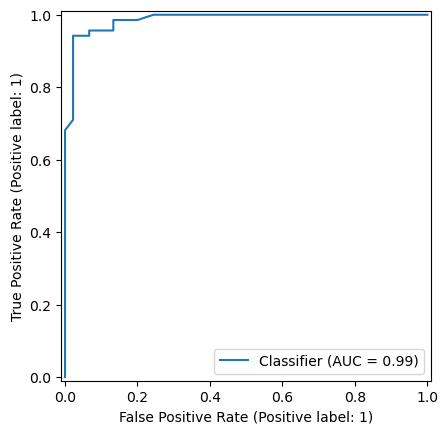

In [28]:
RocCurveDisplay.from_predictions(y_test, y_prob)

In [29]:
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9865


### <a id='toc1_2_7_'></a>[PR AUC score](#toc0_)

PR-AUC is useful for assessing overall model performance across different classification thresholds for imbalanced data.

In [ ]:
pr_auc = average_precision_score(y_test, y_prob)
print(f"PR-AUC Score: {pr_auc:.4f}")

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test, y_prob)